In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_excel('penelitian_acak2.xlsx')

In [ ]:
df

namakecamatan namakelurahan baduta balita pus pus_hamil  \
0         BOGOR BARAT    MARGA JAYA      V      X   X         V   
1        BOGOR TENGAH       BABAKAN      V      V   X         X   
2        BOGOR TENGAH       BABAKAN      V      V   V         X   
3        BOGOR TENGAH      PALEDANG      V      X   V         X   
4       BOGOR SELATAN     KERTAMAYA      X      V   X         V   
...               ...           ...    ...    ...  ..       ...   
307462   TANAH SAREAL       CIBADAK      X      V   X         V   
307463   TANAH SAREAL       CIBADAK      X      V   V         V   
307464   TANAH SAREAL       CIBADAK      V      X   X         V   
307465   TANAH SAREAL       CIBADAK      V      X   X         X   
307466   TANAH SAREAL       CIBADAK      V      V   V         V   

       sumber_air_layak_tidak jamban_layak_tidak terlalu_muda terlalu_tua  \
0                           X                  X            X           X   
1                           X                  X            V           X   
2                           V                  X            X           X   
3                           X                  V            V           X   
4                           X                  X            X           X   
...                       ...                ...          ...         ...   
307462                      V                  V            V           V   
307463                      X                  X            V           V   
307464                      X                  V            V           V   
307465                      X                  X            V           V   
307466                      X                  V            V           X   

       terlalu_dekat terlalu_banyak bukan_peserta_kb_modern  risiko_stunting  \
0                  X              X                       X                0   
1                  X              X                       X                0   
2                  X              X                       X                0   
3                  X              X                       X                1   
4                  X              X                       X                0   
...              ...            ...                     ...              ...   
307462             V              V                       X                0   
307463             V              X                       X                1   
307464             V              V                       X                0   
307465             V              V                       X                0   
307466             V              V                       X                1   

        Tahun       lat         lon  
0        2023 -6.570585  106.740801  
1        2023 -6.589334  106.805437  
2        2023 -6.589334  106.805437  
3        2023 -6.599133  106.792007  
4        2023 -6.649966  106.830969  
...       ...       ...         ...  
307462   2024 -6.542887  106.777748  
307463   2024 -6.542887  106.777748  
307464   2024 -6.542887  106.777748  
307465   2024 -6.542887  106.777748  
307466   2024 -6.542887  106.777748  

[307467 rows x 17 columns]

In [ ]:
binary_cols = df.columns[4:-3]     
for col in binary_cols:
    df[col] = df[col].map({'X': 0, 'V': 1})

In [ ]:
df

baduta balita pus pus_hamil sumber_air_layak_tidak jamban_layak_tidak  \
0           V      X   X         V                      X                  X   
1           V      V   X         X                      X                  X   
2           V      V   V         X                      V                  X   
3           V      X   V         X                      X                  V   
4           X      V   X         V                      X                  X   
...       ...    ...  ..       ...                    ...                ...   
307462      X      V   X         V                      V                  V   
307463      X      V   V         V                      X                  X   
307464      V      X   X         V                      X                  V   
307465      V      X   X         X                      X                  X   
307466      V      V   V         V                      X                  V   

       terlalu_muda terlalu_tua terlalu_dekat terlalu_banyak  \
0                 X           X             X              X   
1                 V           X             X              X   
2                 X           X             X              X   
3                 V           X             X              X   
4                 X           X             X              X   
...             ...         ...           ...            ...   
307462            V           V             V              V   
307463            V           V             V              X   
307464            V           V             V              V   
307465            V           V             V              V   
307466            V           X             V              V   

       bukan_peserta_kb_modern  risiko_stunting  
0                            X                0  
1                            X                0  
2                            X                0  
3                            X                1  
4                            X                0  
...                        ...              ...  
307462                       X                0  
307463                       X                1  
307464                       X                0  
307465                       X                0  
307466                       X                1  

[305712 rows x 12 columns]

In [ ]:
df = df.drop(columns=['namakecamatan', 'namakelurahan', 'Tahun', 'lat', 'lon',])

In [ ]:
df = df.dropna()

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Expected 2D array, got scalar array instead:
array=64.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X = df.drop(columns=['risiko_stunting'])
y = df['risiko_stunting']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(1, X.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9429 - loss: 0.1716 - val_accuracy: 0.9903 - val_loss: 0.0474
Epoch 2/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9906 - loss: 0.0488 - val_accuracy: 0.9906 - val_loss: 0.0468
Epoch 3/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9903 - loss: 0.0484 - val_accuracy: 0.9906 - val_loss: 0.0456
Epoch 4/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9904 - loss: 0.0479 - val_accuracy: 0.9906 - val_loss: 0.0456
Epoch 5/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9905 - loss: 0.0461 - val_accuracy: 0.9905 - val_loss: 0.0459
Epoch 6/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9904 - loss: 0.0462 - val_accuracy: 0.9906 - val_loss: 0.0453
Epoch 7/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9906 - loss: 0.0448 - val_accuracy: 0.9905 - val_loss: 0.0454
Epoch 8/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Uji: {acc:.4f}")

1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0449
Akurasi Uji: 0.9907


In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step


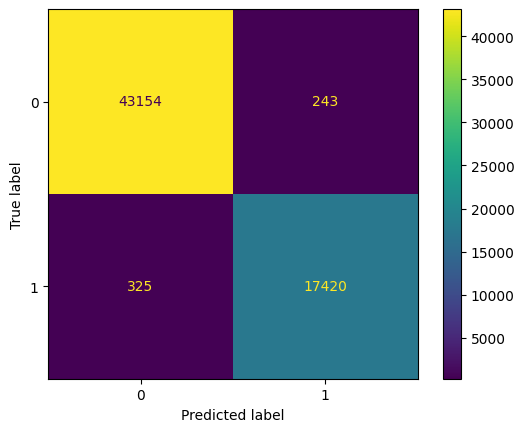

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_label = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     43397
           1       0.99      0.98      0.98     17745

    accuracy                           0.99     61142
   macro avg       0.99      0.99      0.99     61142
weighted avg       0.99      0.99      0.99     61142



In [ ]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc:.4f}")

ROC-AUC Score: 0.9943


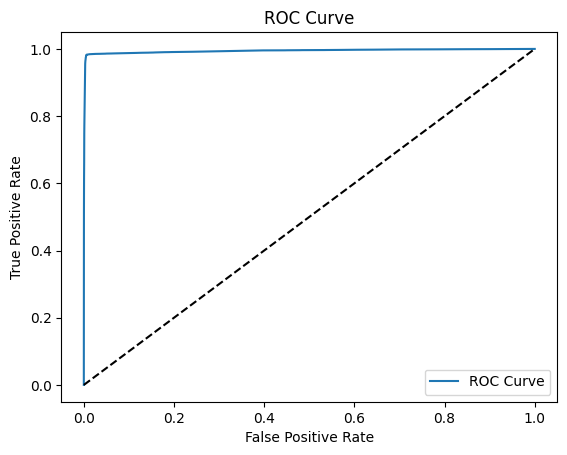

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



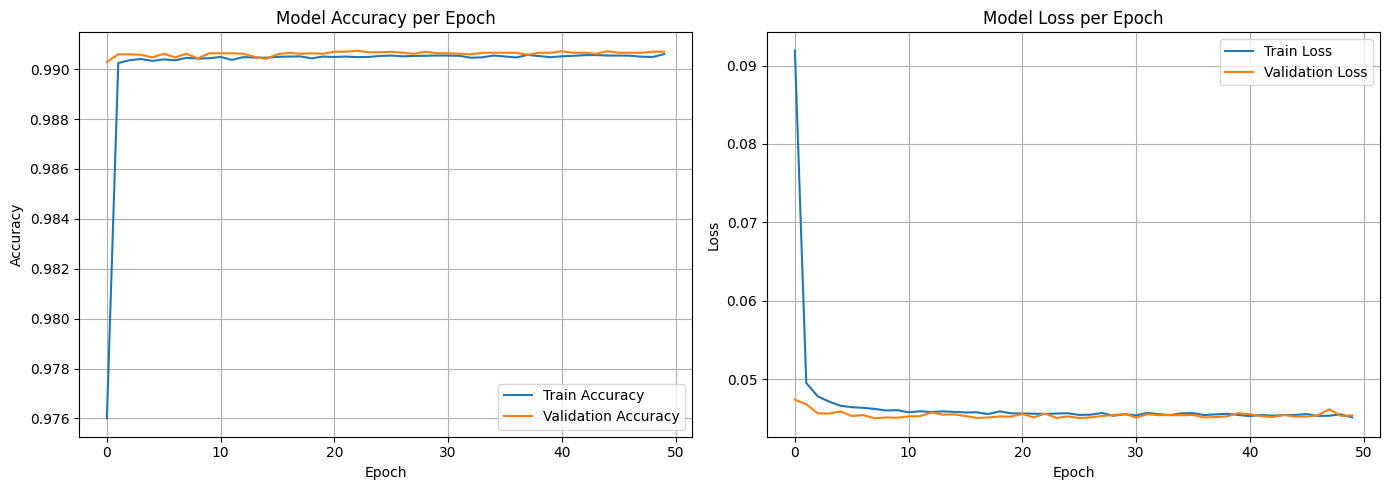

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

model.save("model_lstm_stunting.h5")
scaler_path = "scaler.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)